In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

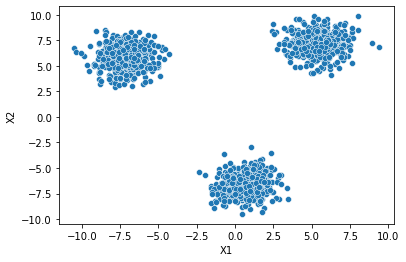

In [4]:
sns.scatterplot(data = blobs, x = 'X1', y = 'X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

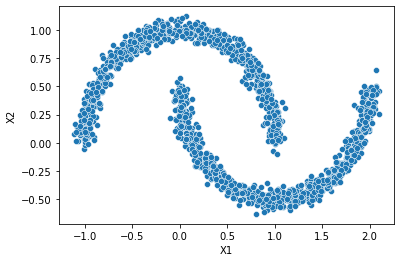

In [7]:
sns.scatterplot(data = moons, x = 'X1', y = 'X2')

In [8]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

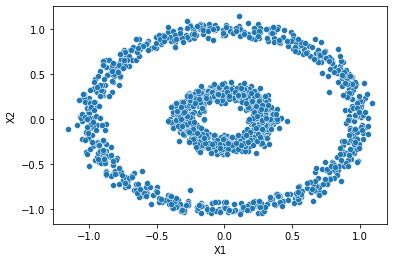

In [10]:
sns.scatterplot(data = circles, x = 'X1', y = 'X2')

In [12]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=3)

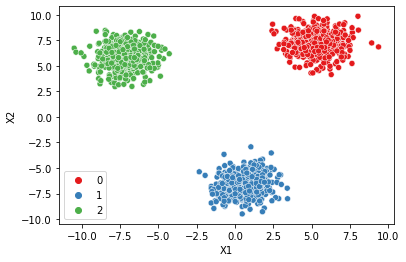

In [15]:
display_categories(model, blobs)

In [16]:
model = KMeans(n_clusters=2)

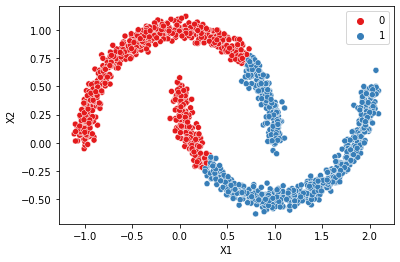

In [17]:
display_categories(model, moons)

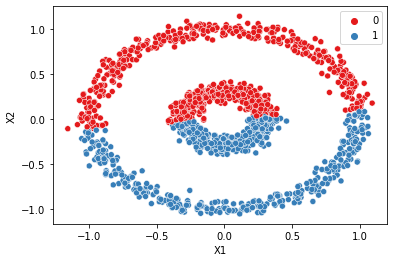

In [18]:
display_categories(model, circles)

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
model = DBSCAN()

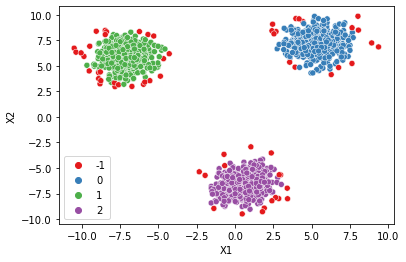

In [21]:
display_categories(model, blobs)

In [22]:
model = DBSCAN(eps = 0.15)

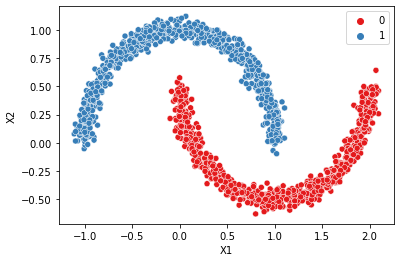

In [23]:
display_categories(model, moons)

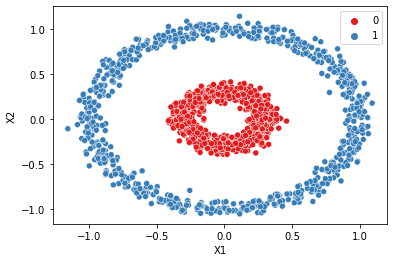

In [24]:
display_categories(model, circles)

In [26]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

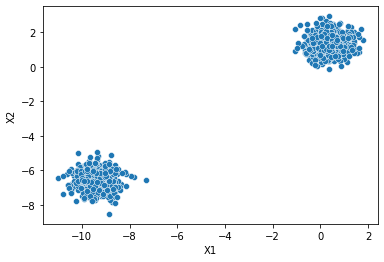

In [27]:
sns.scatterplot(data = two_blobs, x = 'X1', y = 'X2');

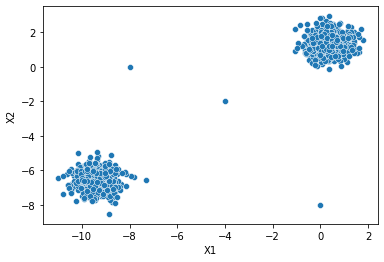

In [28]:
sns.scatterplot(data = two_blobs_outliers, x = 'X1', y = 'X2');

In [29]:
model = DBSCAN()

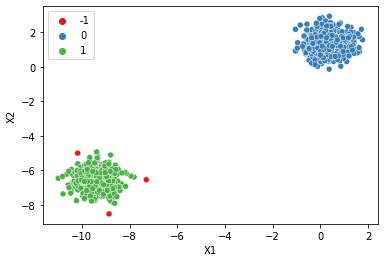

In [30]:
display_categories(model, two_blobs)

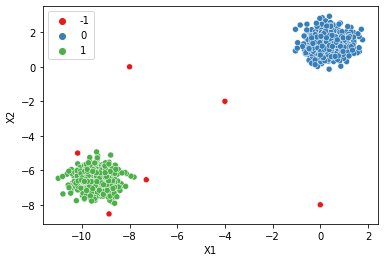

In [31]:
display_categories(model, two_blobs_outliers)

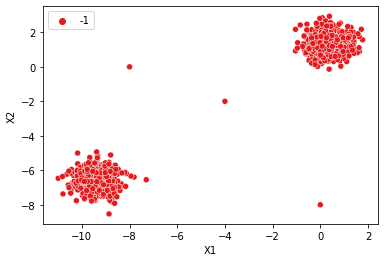

In [33]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

In [41]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

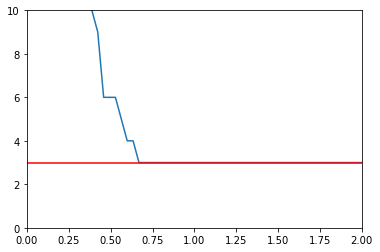

In [40]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 3, xmin = 0, xmax = 2, color = 'red')

<AxesSubplot:>

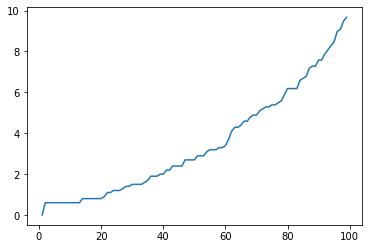

In [42]:
sns.lineplot(x = np.arange(1, 100), y = outlier_percent)


In [43]:
two_blobs_outliers.shape

(1003, 2)